In [15]:
from temgymbasic.model import (
    Model,
)
from temgymbasic import components as comp
import numpy as np
from temgymbasic.utils import calculate_phi_0
from temgymbasic.rays import Rays
import matplotlib.pyplot as plt


In [16]:

n_rays = 400

size = 256
det_shape = (size, size)
pixel_size = 0.001
dsize = det_shape[0] * pixel_size

x_det = np.linspace(-dsize / 2, dsize / 2, size)

lens_dist = 1
focal = 1.0
prop_dist = 1

pupil_radius = 0.1

OF = 1.5
wo = 2 * pupil_radius * OF / (2 * n_rays)
wo = 1e-2

wavelength = wo / 4
k = 2 * np.pi / wavelength

wavelengths = np.full(n_rays, wavelength)

theta_x = 0
theta_y = 0

deg_yx = np.deg2rad((theta_y, theta_x ))
tilt_yx = np.tan(deg_yx)


In [17]:
components = (
    comp.GaussBeam(
        z=0.0,
        voltage=calculate_phi_0(wavelength),
        radius=pupil_radius,
        wo=wo,
        tilt_yx=tilt_yx
    ),
    comp.PerfectLens(
        z1 = -lens_dist,
        z = lens_dist,
        f = focal,
        m = 1e-11
    ),
    comp.AccumulatingDetector(
        z = lens_dist + focal,
        pixel_size=pixel_size,
        shape=det_shape,
        buffer_length=1,
        interference='gauss'
    ),
)

model = Model(components)

rays = tuple(model.run_iter(num_rays=n_rays, random = False, backend='cpu'))

image = model.detector.get_image(rays[-1])

# fig, ax = plt.subplots()
# xvals = np.stack(tuple(r.x for r in rays), axis=0)
# zvals = np.asarray(tuple(r.z for r in rays))
# ax.plot(xvals.get(), zvals)

In [18]:
plt.figure()
plt.plot(rays[0].x, rays[0].y, '.r')

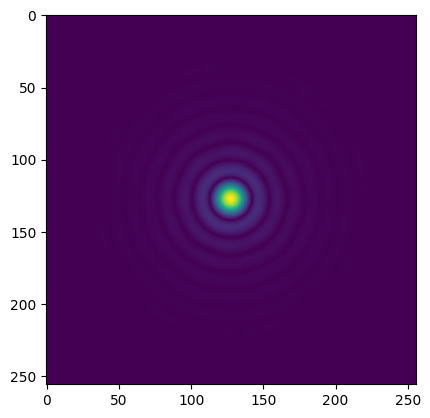

In [19]:
plt.figure()
plt.imshow(np.abs(image))
